# Youtube Trending Data: #0.데이터 전처리

In [68]:
import pandas as pd

### <한국, 일본의 데이터를 불러온 뒤 country 변수 추가>

In [69]:
input_fd = open('KRvideos.csv',errors = 'backslashreplace',encoding='utf-8')
KR_videos = pd.read_csv(input_fd)

KR_videos['country']='Korea'

In [70]:
#KR_videos.head()

In [71]:
input_fd = open('JPvideos.csv', errors = 'backslashreplace',encoding='utf-8')
JP_videos = pd.read_csv(input_fd)

JP_videos['country']='Japan'

In [72]:
#JP_videos.head()

In [73]:
print(KR_videos.shape)
print(JP_videos.shape)

(34567, 17)
(20523, 17)


### <불필요 열 제거>

In [74]:
KR_videos.drop(KR.columns[[6,11,12,13,14,15]], axis='columns', inplace=True)
JP_videos.drop(JP.columns[[6,11,12,13,14,15]], axis='columns', inplace=True)

'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description' 열 삭제
같은 뜻의 말도 여러 말로 쓰일 수 있어 태그를 비교하는 것이 유의미하다고 보기 어려움 => 'tags' 열 삭제

### <중복된 동영상 확인>

In [75]:
KR_videos['video_id'].duplicated().value_counts()

True     18691
False    15876
Name: video_id, dtype: int64

In [76]:
JP_videos['video_id'].duplicated().value_counts()

False    12912
True      7611
Name: video_id, dtype: int64


중복된 데이터의 양이 꽤 많음 => 중복 데이터 제거

In [77]:
KR_videos = KR_videos.drop_duplicates(['video_id'])[:]
JP_videos = JP_videos.drop_duplicates(['video_id'])[:]

In [78]:
print(KR_videos.shape)
print(JP_videos.shape)

(15876, 11)
(12912, 11)


### <한국과 일본의 데이터 병합>

In [79]:
total = pd.concat([KR_videos, JP_videos],sort=True)
#total.head()

### <열 추가>

In [80]:
# 'likes'와 'dislikes'를 합친 'opinion'열 만들기
total['opinion'] = total['likes'] + total['dislikes']

카테고리 변수 설명 들어있는 json파일 불러온 뒤 기존 df에 붙이기

In [81]:
import json

id_to_category = {}

with open(r"C://Users/user/Downloads/youtube/KR_category_id.json", 'r') as f:
    data = json.load(f)
    for category in data['items']:
        id_to_category[category['id']] = category['snippet']['title']

#id_to_category

In [82]:
total["category_id"] = total["category_id"].astype(str)
total.insert(4, "category", total["category_id"].map(id_to_category))

# Youtube Trending Data: #1. 카테고리 별 자료 분석

## 1. 카테고리별 조회수 비교

### 1-1 카테고리별 평균 조회수 계산

In [90]:
avg_view_by_category = total.groupby('category')['views'].mean() 

In [91]:
#카테고리별 평균 조회수
avg_view_by_category

category
Autos & Vehicles        5.573237e+04
Comedy                  2.760211e+05
Education               7.326688e+04
Entertainment           2.489553e+05
Film & Animation        2.445753e+05
Gaming                  1.510189e+05
Howto & Style           1.787163e+05
Music                   7.885852e+05
News & Politics         1.004190e+05
People & Blogs          1.207632e+05
Pets & Animals          6.582092e+04
Science & Technology    1.188912e+06
Shows                   7.653503e+04
Sports                  3.244271e+05
Trailers                1.345400e+04
Travel & Events         1.262409e+05
Name: views, dtype: float64

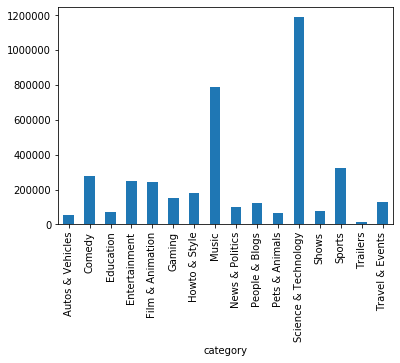

In [92]:
#카테고리별 평균 조회수 그래프
avg_view_by_category.plot(kind="bar")

<평균 조회수 상위 3개>

In [93]:
avg_view_by_category.sort_values(ascending=False).head(3)

category
Science & Technology    1.188912e+06
Music                   7.885852e+05
Sports                  3.244271e+05
Name: views, dtype: float64

Science & Technology, Music, Film & Animation의 평균조회수가 가장 높음

<평균 조회수 하위 3개>

In [94]:
avg_view_by_category.sort_values(ascending=True).head(3)

category
Trailers            13454.000000
Autos & Vehicles    55732.369565
Pets & Animals      65820.917059
Name: views, dtype: float64

Trailers, Nonprofits & Activism, Autos & Vehicles의 평균 조회수가 가장 낮음

## 2. 카테고리별 호불호 분석

### 2-1 카테고리별 평균 likes, dislikes

In [97]:
#카테고리별 평균 likes와 dislikes의 수
by_category = total.groupby('category').agg({"likes":"mean","dislikes":"mean"})
by_category

,likes,dislikes
category,,
Autos & Vehicles,883.250000,57.206522
Comedy,6900.802600,268.326564
Education,2139.433121,77.267516
Entertainment,5383.325699,361.178287
Film & Animation,4382.020396,187.103832
Gaming,3868.219614,141.369656
Howto & Style,3568.996078,186.853595
Music,64952.011831,1287.638854
News & Politics,1528.183990,121.074026


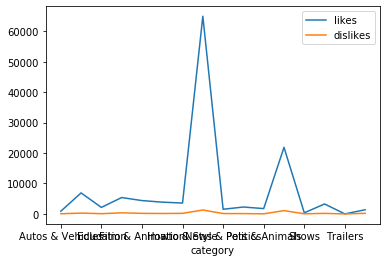

In [98]:
#카테고리별 평균 likes와 dislikes의 수 그래프
by_category.plot()

likes와 dislikes의 차이가 매우 큰 카테고리 존재 -> 비율로 살펴보기

### 2-2 likes와 dislikes의 비율 비교

In [104]:
#비율 함수 생성
def rate(a,b):
    return a/b

In [105]:
by_category_rates=rate(by_category['likes'],by_category['dislikes'])

In [106]:
# likes와 dislikes의 비율
by_category_rates

category
Autos & Vehicles        15.439673
Comedy                  25.717926
Education               27.688649
Entertainment           14.904898
Film & Animation        23.420260
Gaming                  27.362446
Howto & Style           19.100495
Music                   50.442724
News & Politics         12.621898
People & Blogs          21.449241
Pets & Animals          50.365275
Science & Technology    20.173530
Shows                    8.956359
Sports                  18.495113
Trailers                      inf
Travel & Events          7.136900
dtype: float64

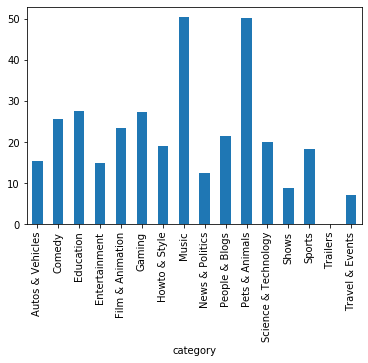

In [107]:
#likes와 dislikes의 비율 그래프
by_category_rates.plot(kind="bar")

호불호가 많이 갈리는 카테고리

In [109]:
by_category_rates.sort_values(ascending=False).head(3)

category
Trailers                inf
Music             50.442724
Pets & Animals    50.365275
dtype: float64

Pets & Animals와 Musics 카테고리에서 dislike에 비해 like 수가 50배 정도로 비교적 높은 것으로 나타남

(Trailers는 likes 3개, dislikes 0개로 유의미하지 않아 제외)

호불호가 적게 갈리는 카테고리

In [110]:
by_category_rates.sort_values(ascending=True).head(3)

category
Travel & Events     7.136900
Shows               8.956359
News & Politics    12.621898
dtype: float64

반대로 Travel & Events와 shows, News & Politics 에서는 타 카테고리에 비해 like와 dislike의 차이가 크지 않음, 즉 호불호가 갈린다고 볼 수 있음

# Youtube Trending Data: #2. 나라 별 자료 분석

## 1. 전체 자료 수/자료 수 대비 조회수 비교

### 1-1. 나라 별 총 동영상 수

In [112]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn as sns

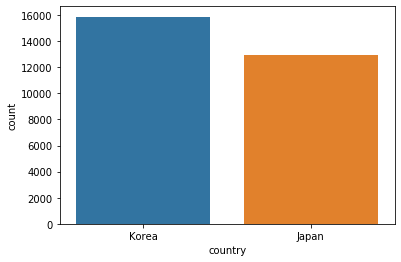

In [114]:
ax = plt.subplots() 
ax = sns.countplot('country', data=total)

### 1-2. 나라 별 평균 조회수

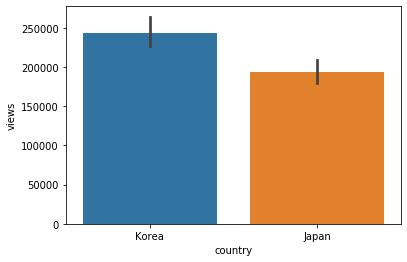

In [115]:
ax = plt.subplots() 
ax = sns.barplot(x='country', y='views', data=total)

업로드한 동영상 수는 한국이 일본보다 많고 평균 조회수도 한국이 일본보다 높다.

한국 유튜브 사용자(채널 운영자+서비스 이용자)가 일본 유튜브 사용자보다 많다.


### 1-3. 나라 별 조회수/자료수

In [116]:
print('한국:', sum(total[total['country']=="Korea"]['views'])/len(total[total['country']=="Korea"]))
print('일본:', sum(total[total['country']=="Japan"]['views'])/len(total[total['country']=="Japan"]))


#total_KR = total[total['country']=="Korea"]
#total_JP = total[total['country']=="Japan"]

#ax = plt.subplots() 
#ax = sns.barplot(x='country', y='ratio', data=total)

한국: 243673.93795666416
일본: 193014.781366171


동영상 하나 당 조회수 또한 한국이 일본보다 잘 나온다.

## 2. 카테고리 비교


### 2-1. 나라 별 카테고리 당 동영상 수


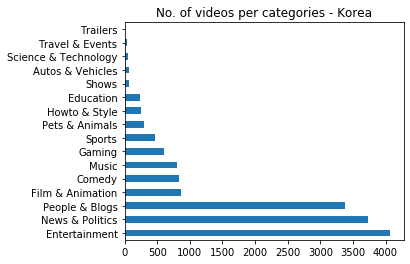

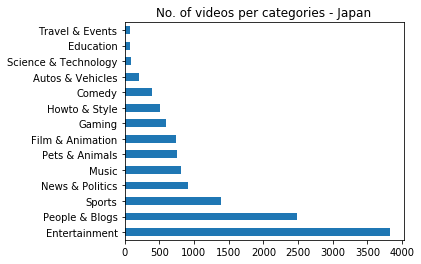

In [117]:
total_KR = total[total['country']=="Korea"]
total_JP = total[total['country']=="Japan"]

category_count_KR = total_KR['category'].value_counts()
category_count_JP = total_JP['category'].value_counts() 


plt.figure(1)
ax1 = category_count_KR.plot.barh(figsize=(5,4))

plt.figure(2)
ax2 = category_count_JP.plot.barh(figsize=(5,4))

ax1.set_title('No. of videos per categories - Korea')
ax2.set_title('No. of videos per categories - Japan')

plt.show()


한국 top5: Entertainment -> News&Politics -> People&Blogs -> Film&Animation -> Comedy

일본 top5: Entertainment -> People&Blogs -> Sports -> News&Politics -> Music

두 나라 모두 Entertainment 분야의 동영상이 가장 많다. 한국은 일본보다 비교적 News&Politics 분야의 컨텐츠가 많고 일본은 비교적 Sports 분야의 컨텐츠가 많다.

### 2-2. 나라 별 카테고리 당 조회수


Text(0.5, 1.0, 'View counts per categories - Japan')

<Figure size 432x288 with 0 Axes>

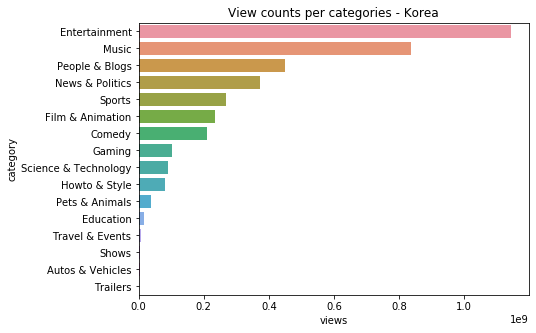

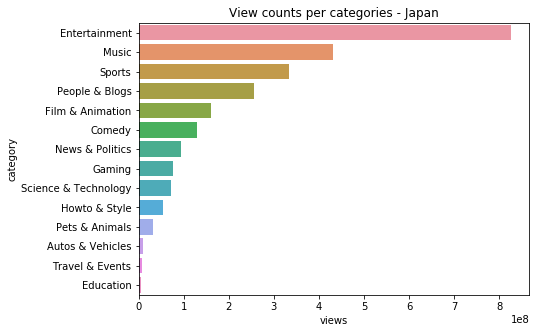

In [123]:
viewskr = total_KR.groupby('category')['views'].agg('sum')
viewskr = viewskr.sort_values(ascending=False).reset_index()

plt.figure(1)
viewskr.columns = ['category','views']
plt.subplots(figsize=(7, 5))
kr = sns.barplot(x="views", y="category", data=viewskr)
kr.set_title("View counts per categories - Korea") 


viewsjp = total_JP.groupby('category')['views'].agg('sum')
viewsjp = viewsjp.sort_values(ascending=False).reset_index()

plt.figure(2)
viewsjp.columns = ['category','views']
plt.subplots(figsize=(7, 5))
kr = sns.barplot(x="views", y="category", data=viewsjp)
kr.set_title("View counts per categories - Japan")

한국 top5: Entertainment -> Music -> People&Blogs -> Film&Animation -> Comedy

일본 top5: Entertainment -> Music -> People&Blogs -> Sports -> Film&Animation

두 나라 모두 Entertainment 분야의 컨텐츠의 조회수가 가장 높다. 한국은 일본보다 비교적 Film&Animation 분야가 조회수가 잘나오고, 일본은 비교적 Sports 분야가 조회수가 잘나온다.

하지만 동영상 수에 비해 나라 별 편차는 적다. 특히 두 나라에서 모두 컨텐츠의 양에 비해 Music 분야의 동영상이 조회수가 높은 것을 확인할 수 있다.

### <아쉬운 점>

'이재정 더불어 민주당 의원 / 종북 몰이 전희경 / 걸크러쉬 이재정 / 주광덕 전희... ', '수년간 이어져 온 성심병원 간호사 장기자랑 논란. 성심병원 일부 간호사들이 재단 체...' 등이 Entertainment에 분류됨.

# Youtube Trending Data: #3. 조회수와 연관이 있는 항목

## 1. 댓글 수, 좋아요, 싫어요의 조회수 영향도

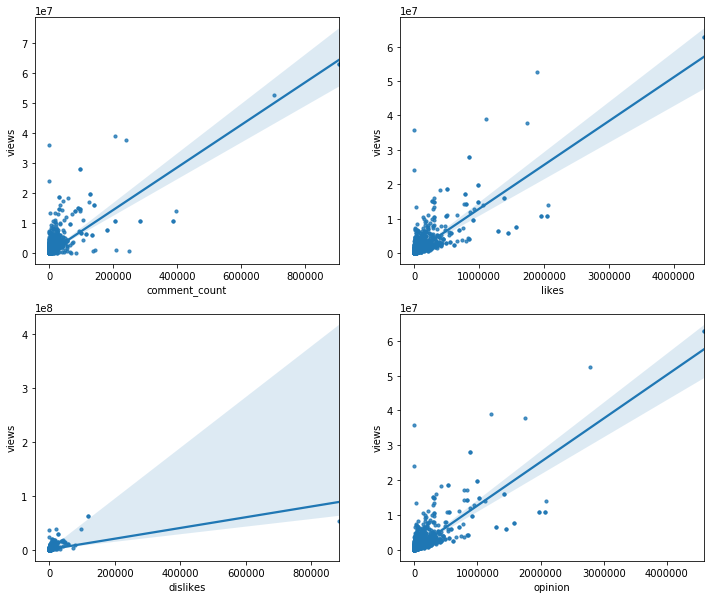

In [120]:
# 산점도와 선형 회귀 직선
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(ncols=2, nrows=2)
fig.set_size_inches(12,10)
sns.regplot(x='comment_count', y='views', data=total, scatter_kws={'s':10}, ax=ax1)
sns.regplot(x='likes', y='views', data=total, scatter_kws={'s':10}, ax=ax2)
sns.regplot(x='dislikes', y='views', data=total, scatter_kws={'s':10}, ax=ax3)
sns.regplot(x='opinion', y='views', data=total, scatter_kws={'s':10}, ax=ax4)

댓글, 좋아요와 의견(좋아요+싫어요) 모두의 조회수 영향도가 매우 크게 나타난다. (양 방향의 선형성)

싫어요 칼럼은 다른 칼럼보다 조회수 영향도가 작다.

## 2. 댓글 수와 좋아요/싫어요의 관계


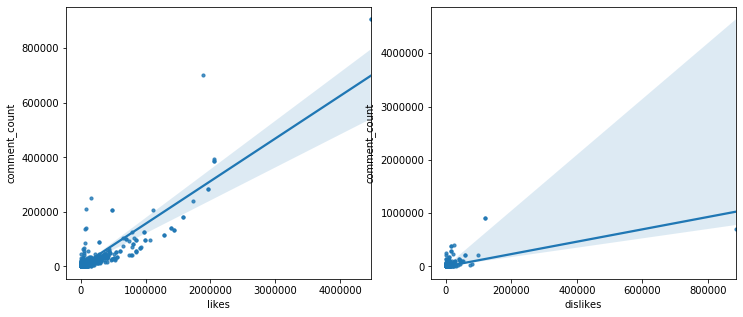

In [121]:
fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1)
fig.set_size_inches(12,5)
sns.regplot(x='likes', y='comment_count', data=total, scatter_kws={'s':10}, ax=ax1)
sns.regplot(x='dislikes', y='comment_count', data=total, scatter_kws={'s':10}, ax=ax2)

댓글도 마찬가지로 좋아요와는 양 방향의 선형성을 크게 띄고 싫어요와는 상대적으로 작게 띈다.